We will use weather data provided by Max Planck Institute for BiogeoChemistry.


In [150]:
  #Download the data
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip --quiet

In [151]:
!ls -l

total 81916
-rw-r--r-- 1 root root 43164220 Mar 19  2017 jena_climate_2009_2016.csv
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip.1
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip.2
drwxr-xr-x 1 root root     4096 May 14 13:38 sample_data


In [152]:
 #Unzip the file
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
replace jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: jena_climate_2009_2016.csv  


In [153]:
!ls -l

total 81916
-rw-r--r-- 1 root root 43164220 Mar 19  2017 jena_climate_2009_2016.csv
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip.1
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip.2
drwxr-xr-x 1 root root     4096 May 14 13:38 sample_data


In [154]:
import pandas as pd
import numpy as np

In [155]:
df = pd.read_csv("jena_climate_2009_2016.csv")

In [156]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [157]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [158]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


## as we can see the data is from 2009 to 2017, data every 10 minutes

In [159]:
df.shape

(420551, 15)

### What is the frequency of Time-Series Data?

In [160]:
# data is taken every 10 mins

In [161]:
df.isnull().sum()

,0
Date Time,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0


### **no missing values**


In [162]:
#if there are missing values in time series data we should impute the missing values before proceeding

### Data for Air Temprature

In [163]:
import matplotlib.pyplot as plt

#### Exercise 1: Build a model which will predict Future "Air Temprature" based on the past data

In [164]:
 #Get data for Air Tempreture
temp_df = df[['T (degC)']]

 #Make Date time column as index to make sure data is sorted
temp_df.index = df[['Date Time']]


In [165]:

 #Check data
temp_df.head(n=50)


,T (degC)
"(01.01.2009 00:10:00,)",-8.02
"(01.01.2009 00:20:00,)",-8.41
"(01.01.2009 00:30:00,)",-8.51
"(01.01.2009 00:40:00,)",-8.31
"(01.01.2009 00:50:00,)",-8.27
"(01.01.2009 01:00:00,)",-8.05
"(01.01.2009 01:10:00,)",-7.62
"(01.01.2009 01:20:00,)",-7.62
"(01.01.2009 01:30:00,)",-7.91
"(01.01.2009 01:40:00,)",-8.43


In [166]:

temp_df.tail(n=50)


,T (degC)
"(31.12.2016 15:50:00,)",3.56
"(31.12.2016 16:00:00,)",2.87
"(31.12.2016 16:10:00,)",2.44
"(31.12.2016 16:20:00,)",2.13
"(31.12.2016 16:30:00,)",1.98
"(31.12.2016 16:40:00,)",1.67
"(31.12.2016 16:50:00,)",1.61
"(31.12.2016 17:00:00,)",1.41
"(31.12.2016 17:10:00,)",1.29
"(31.12.2016 17:20:00,)",0.79


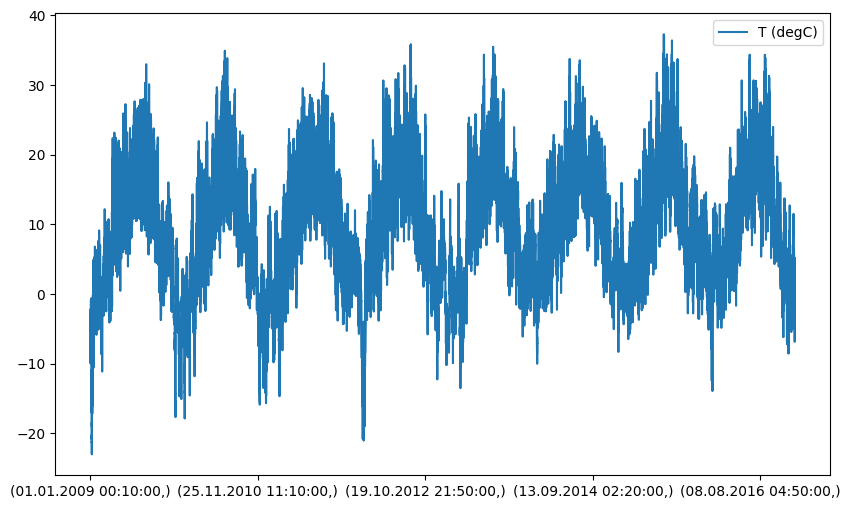

In [167]:

 #Visualize data
temp_df.plot(subplots=True, figsize=(10,6))
plt.show()


In [168]:
def prepare_xy(dataset, window_size=20):
     dataX, dataY = [], []
     for i in range(len(dataset)-window_size):
         #Prepare input features
         input_features = dataset[i:(i+window_size)]
         dataX.append(input_features)

         #Prepare Label
         label = dataset[i + window_size]
         dataY.append(label)

     return np.array(dataX), np.array(dataY)

# window size = how many past value we want to look at to guess the temp

In [169]:
temp_df.shape

(420551, 1)

### Data Preparation

###Split data between Training and Test

In [170]:
#Number of training examples - set to 80%
num_training_examples = int(0.8 * temp_df.shape[0])
num_training_examples

336440

In [171]:

#Prepare training and test data
train_data = temp_df['T (degC)'].tolist()[:num_training_examples]
test_data = temp_df['T (degC)'].tolist()[num_training_examples:]

In [172]:
#Check the data
print(train_data[:100])

[-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91, -8.43, -8.76, -8.88, -8.85, -8.83, -8.66, -8.66, -8.7, -8.81, -8.84, -8.94, -8.94, -8.86, -8.99, -9.05, -9.23, -9.49, -9.5, -9.35, -9.47, -9.63, -9.67, -9.68, -9.9, -9.91, -9.51, -9.67, -9.59, -9.15, -8.91, -9.04, -9.43, -9.17, -8.71, -8.55, -8.4, -8.3, -8.13, -8.1, -8.14, -8.06, -7.95, -7.74, -7.57, -7.66, -7.71, -7.56, -7.29, -7.15, -7.02, -7.04, -7.03, -7.15, -7.26, -7.34, -7.35, -7.41, -7.48, -7.38, -7.21, -7.16, -7.03, -6.87, -6.77, -6.7, -6.61, -6.51, -6.21, -5.89, -5.83, -5.76, -5.9, -5.97, -5.88, -5.94, -5.84, -5.76, -5.75, -5.76, -5.73, -5.69, -5.53, -5.57, -5.43, -5.32, -5.36, -5.4, -5.31, -5.28, -5.32, -5.29]


In [173]:
#Find the mean standard deviation
mean = np.array(train_data).mean()
std = np.array(train_data).std()

In [174]:
#Find the mean standard deviation
mean = np.array(train_data).mean()
std = np.array(train_data).std()

In [175]:
mean, std

(np.float64(8.987612768992983), np.float64(8.440672143902399))

### Normalize the data

In [176]:
#Normalize training and test data   ,
# we have manually standarized here by finding mean and std ,
# however Standard scalar or minmax saclar can be used
norm_train = (np.array(train_data) - mean)/std
norm_test = (np.array(test_data) - mean)/std

In [177]:
norm_train[:100]

array([-2.01495953, -2.06116438, -2.07301178, -2.04931698, -2.04457802,
       -2.01851375, -1.96756994, -1.96756994, -2.00192739, -2.06353386,
       -2.10263027, -2.11684715, -2.11329293, -2.11092345, -2.09078287,
       -2.09078287, -2.09552183, -2.10855397, -2.11210819, -2.12395559,
       -2.12395559, -2.11447767, -2.12987929, -2.13698773, -2.15831304,
       -2.18911628, -2.19030102, -2.17252992, -2.1867468 , -2.20570263,
       -2.21044159, -2.21162633, -2.23769061, -2.23887535, -2.19148576,
       -2.21044159, -2.20096367, -2.14883512, -2.12040137, -2.13580299,
       -2.18200784, -2.1512046 , -2.09670657, -2.07775074, -2.05997964,
       -2.04813224, -2.02799167, -2.02443745, -2.02917641, -2.01969849,
       -2.00666635, -1.98178682, -1.96164624, -1.9723089 , -1.9782326 ,
       -1.9604615 , -1.92847353, -1.91188717, -1.89648555, -1.89885503,
       -1.89767029, -1.91188717, -1.92491931, -1.93439722, -1.93558196,
       -1.9426904 , -1.95098358, -1.93913618, -1.91899561, -1.91

In [178]:
def prepare_xy(dataset, window_size=20):
     dataX, dataY = [], []
     for i in range(len(dataset)-window_size):
         #Prepare input features
         input_features = dataset[i:(i+window_size)]
         dataX.append(input_features)

         #Prepare Label
         label = dataset[i + window_size]
         dataY.append(label)

     return np.array(dataX), np.array(dataY)

In [179]:
#Prepare x,y for train and test
train_x, train_y = prepare_xy(norm_train)
test_x, test_y = prepare_xy(norm_test)

###Build X and y for model : X=Features, y=Label

In [180]:
train_x.shape

(336420, 20)

In [181]:
train_y.shape

(336420,)

In [182]:
train_x[0]

array([-2.01495953, -2.06116438, -2.07301178, -2.04931698, -2.04457802,
       -2.01851375, -1.96756994, -1.96756994, -2.00192739, -2.06353386,
       -2.10263027, -2.11684715, -2.11329293, -2.11092345, -2.09078287,
       -2.09078287, -2.09552183, -2.10855397, -2.11210819, -2.12395559])

In [183]:
train_y[0]

np.float64(-2.1239555882932875)

### Visualize single example

In [184]:
def show_example(input_features, target, prediction=None):
     #Plot historical values
     plt.plot(list(range(input_features.shape[0])), input_features.flatten(), 'b.-', label='History')

     #Plot target
     plt.plot(input_features.shape[0]+1, target, 'rx', markersize=10, label='Actual')

     #Plot prediction, if applicable
     if prediction is not None:
         plt.plot(input_features.shape[0]+1, prediction, 'go', markersize=10, label='Prediction')

     plt.legend()
     plt.show()



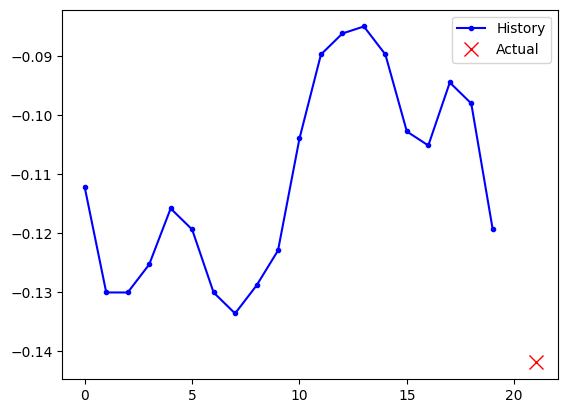

In [185]:
#Display examples
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num])

### Prediction using Average Method

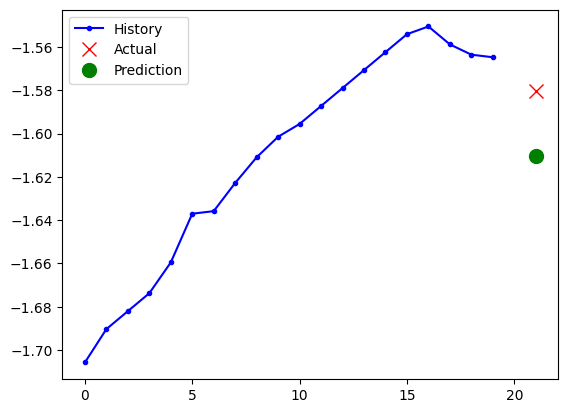

In [186]:
#Prediction is taken as average of all the points in sequence e.g 20
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num], train_x[exp_num].mean())

In [187]:
train_x.shape

(336420, 20)

### Build Model

In [188]:
import tensorflow as tf

In [189]:
#Random seed for reproducibility
tf.random.set_seed(13)

In [190]:
#Build Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [191]:
#Add LSTM layer
model.add(tf.keras.layers.LSTM(8, input_shape=(train_x.shape[1], 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [192]:
#Add Output layer
model.add(tf.keras.layers.Dense(1))

In [193]:
#Compile the model
model.compile(optimizer='adam', loss='mae')

In [194]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

### convert data to 3D before train

In [195]:
train_x.shape

(336420, 20)

In [196]:
train_x = np.expand_dims(train_x, axis=2)
test_x = np.expand_dims(test_x, axis=2)

In [197]:
train_x.shape

(336420, 20, 1)

In [198]:
train_y.shape

(336420,)

In [199]:
model.fit(train_x, train_y,
         validation_data=(test_x, test_y),
          epochs=20,
         batch_size=256, verbose=True)

Epoch 1/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.1735 - val_loss: 0.0215
Epoch 2/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0201 - val_loss: 0.0180
Epoch 3/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 4/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 5/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 6/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 7/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0154 - val_loss: 0.0156
Epoch 8/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0154 - val_loss: 0.0156
Epoch 9/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 10/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 11/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 12

In [200]:
#Model Prediction on first example
a = model.predict(test_x[0:1])
print('Normalized Prediction', a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Normalized Prediction [[0.63222724]]


In [201]:
print('De-normalized Prediction', a * std + mean)

De-normalized Prediction [[14.32403564]]


In [202]:
#Actual
test_y[0]*std+mean

np.float64(14.3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


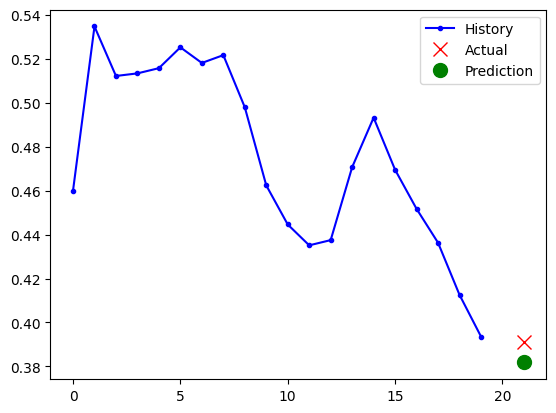

In [207]:
#Pick a test example
exp_num = np.random.randint(0, test_x.shape[0])

#Make input example a batch of 1
prediction = model.predict(np.expand_dims(test_x[exp_num], axis=0))
#Visualize
show_example(test_x[exp_num], test_y[exp_num], prediction[0])

### Multiple Time-Series Data Preparation

In [54]:
#Air tempreture, pressure and air density
features_to_include = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
#Get data
multi_df = df[features_to_include]
multi_df.index = df['Date Time'] # sorting

In [55]:
multi_df.head(n=10)

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,-8.02,996.52,1307.75
01.01.2009 00:20:00,-8.41,996.57,1309.80
01.01.2009 00:30:00,-8.51,996.53,1310.24
01.01.2009 00:40:00,-8.31,996.51,1309.19
01.01.2009 00:50:00,-8.27,996.51,1309.00
01.01.2009 01:00:00,-8.05,996.50,1307.86
01.01.2009 01:10:00,-7.62,996.50,1305.68
01.01.2009 01:20:00,-7.62,996.50,1305.69
01.01.2009 01:30:00,-7.91,996.50,1307.17


In [56]:
num_training_examples = int(0.8 * multi_df.shape[0])

In [57]:
#Train and Test data
train_df = multi_df.iloc[:num_training_examples, :]
test_df = multi_df.iloc[num_training_examples:, :]

In [58]:
train_df.shape

(336440, 3)

### Normalize data

In [59]:
#Find mean and standard deviation
mean_multi = train_df.mean()
std_multi = train_df.std()

In [60]:
mean_multi

,0
T (degC),8.987613
p (mbar),988.832741
rho (g/m**3),1217.704598


In [61]:
std_multi

,0
T (degC),8.440685
p (mbar),8.349543
rho (g/m**3),40.129560


In [62]:
#Normalize Train and Test data
norm_train_df = (train_df - mean_multi) / std_multi
norm_test_df = (test_df - mean_multi) / std_multi

In [63]:
norm_train_df.head()

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,-2.014957,0.920680,2.243867
01.01.2009 00:20:00,-2.061161,0.926669,2.294952
01.01.2009 00:30:00,-2.073009,0.921878,2.305916
01.01.2009 00:40:00,-2.049314,0.919483,2.279751
01.01.2009 00:50:00,-2.044575,0.919483,2.275016


### **after normalization ranges of all the cols are similar**

In [64]:
def prepare_xy_multi(dataset, num_time_series=3, window_size=[20,15,10], target_series=0):
    dataX, dataY = [], []
    act_data = []

    for i in range(num_time_series):
        dataX.append([]) #Initialize an empty list for each time series
        act_data.append(dataset.iloc[:,i].to_list())

    #Get max window size
    max_window_size = max(window_size)

    for i in range(len(dataset)-max_window_size):
         #Prepare input for each time series
         for j in range(num_time_series):
             #Prepare input features
             input_features = act_data[j][i+(max_window_size-window_size[j]):i+max_window_size]
             dataX[j].append(input_features)

         #Prepare Label
         label = act_data[target_series][i + max_window_size]
         dataY.append(label)

    return dataX, dataY

In [65]:
#Prepare Training and Test X, y
train_x_multi, train_y_multi = prepare_xy_multi(norm_train_df)
test_x_multi, test_y_multi = prepare_xy_multi(norm_test_df)

In [66]:
len(train_x_multi)

3

In [67]:
train_x_multi[0][0]

[-2.0149565346417266,
 -2.0611613171226018,
 -2.073008697245903,
 -2.0493139369993005,
 -2.04457498494998,
 -2.0185107486787173,
 -1.9675670141485213,
 -1.9675670141485213,
 -2.001924416506095,
 -2.0635307931472617,
 -2.102627147554156,
 -2.1168440037021177,
 -2.1132897896651275,
 -2.110920313640467,
 -2.0907797674308553,
 -2.0907797674308553,
 -2.0955187194801757,
 -2.1085508376158066,
 -2.1121050516527973,
 -2.1239524317760985]

## Build Model 2

In [68]:
import tensorflow as tf

#Build 3 input layers - one for each time series
input_1 = tf.keras.layers.Input(shape=(20, 1)) #Tempreture
input_2 = tf.keras.layers.Input(shape=(15, 1)) #Pressure
input_3 = tf.keras.layers.Input(shape=(10, 1)) #Relative humidity

#Build 3 LSTM Layers - One for each time series
lstm_1 = tf.keras.layers.LSTM(8)(input_1)
lstm_2 = tf.keras.layers.LSTM(6)(input_2)
lstm_3 = tf.keras.layers.LSTM(5)(input_3)

In [69]:
lstm_1 # has 8 in output

<KerasTensor shape=(None, 8), dtype=float32, sparse=False, name=keras_tensor_7>

In [70]:
lstm_2

<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_8>

In [71]:
lstm_3

<KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_9>

In [72]:
#Concatenate LSTM layers output
cat = tf.keras.layers.concatenate([lstm_1, lstm_2, lstm_3])

In [73]:
cat

<KerasTensor shape=(None, 19), dtype=float32, sparse=False, name=keras_tensor_10>

In [74]:
# we are going to get 19 numbers after concat, cat of all the 3 lstms

In [75]:
#Output Layer
op = tf.keras.layers.Dense(1)(cat)

In [76]:
op

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_11>

In [77]:
#Build Non-Sequential Model
model_multi = tf.keras.Model(inputs=[input_1, input_2, input_3], #3 Inputs
                            outputs=op) #Output

In [78]:
#compile model
model_multi.compile(optimizer='adam', loss='mae')

In [79]:
model_multi.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 15, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 8)         │        320 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 6)         │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 5)         │        140 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 19)        │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ lstm_2[0][0],     │
│                     │                   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         20 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 672 (2.62 KB)

 Trainable params: 672 (2.62 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

###Convert data to 3D before train

In [80]:
1 # We need to feed 3 inputs. Each input will be 3 dimensional: (num_samples, num_features, 1)
#Assume train_x_multi is a list of 3 arrays (features from 3 different sources):


#Build data for training
train_x_multi_1 = np.reshape(np.array(train_x_multi[0]), (len(train_x_multi[0]), len(train_x_multi[0][0]), 1))
train_x_multi_2 = np.reshape(np.array(train_x_multi[1]), (len(train_x_multi[1]), len(train_x_multi[1][0]), 1))
train_x_multi_3 = np.reshape(np.array(train_x_multi[2]), (len(train_x_multi[2]), len(train_x_multi[2][0]), 1))

train_x_multi_1.shape

(336420, 20, 1)

In [81]:
#Build data for test
test_x_multi_1 = np.reshape(np.array(test_x_multi[0]), (len(test_x_multi[0]), len(test_x_multi[0][0]), 1))
test_x_multi_2 = np.reshape(np.array(test_x_multi[1]), (len(test_x_multi[1]), len(test_x_multi[1][0]), 1))
test_x_multi_3 = np.reshape(np.array(test_x_multi[2]), (len(test_x_multi[2]), len(test_x_multi[2][0]), 1))

In [82]:
test_x_multi_1.shape

(84091, 20, 1)

In [83]:
#Model training
model_multi.fit([train_x_multi_1, train_x_multi_2, train_x_multi_3], np.array(train_y_multi),
                validation_data=([test_x_multi_1, test_x_multi_2, test_x_multi_3], np.array(test_y_multi)),
                epochs=10,
                batch_size=256)

Epoch 1/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - loss: 0.1510 - val_loss: 0.0255
Epoch 2/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - loss: 0.0232 - val_loss: 0.0211
Epoch 3/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - loss: 0.0193 - val_loss: 0.0181
Epoch 4/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 0.0175 - val_loss: 0.0168
Epoch 5/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.0165 - val_loss: 0.0163
Epoch 6/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 7/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0156 - val_loss: 0.0158
Epoch 8/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - loss: 0.0154 - val_loss: 0.0156
Epoch 9/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 10/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 0.0153 - val_loss: 0.0159


## visualize Model Prediction

(1, 20) (1, 15)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


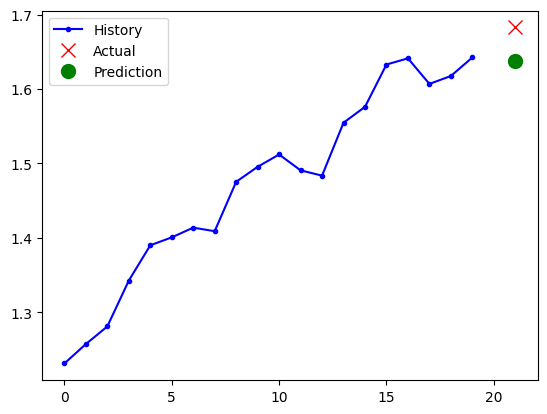

In [84]:
#Pick a test example
exp_num = np.random.randint(0, len(test_y_multi))

#Prepare 3 batch inputs - each 3 dimensional
in_1 = np.expand_dims(np.array(test_x_multi[0][exp_num]), axis=0)
in_2 = np.expand_dims(np.array(test_x_multi[1][exp_num]), axis=0)
in_3 = np.expand_dims(np.array(test_x_multi[2][exp_num]), axis=0)

print(in_1.shape, in_2.shape)
#Make prediction
prediction = model_multi.predict([in_1, in_2, in_3])

#Visualize
show_example(in_1[0], test_y_multi[exp_num], prediction[0])

### using single LTSM for multiple time series with same window size

In [85]:
train_x_multi, train_y_multi = prepare_xy_multi(norm_train_df, window_size=[20,20,20])
test_x_multi, test_y_multi = prepare_xy_multi(norm_test_df, window_size=[20,20,20])

In [86]:
train_x = np.concatenate([np.reshape(train_x_multi[0], (-1, 20, 1)),
                          np.reshape(train_x_multi[1], (-1, 20, 1)),
                          np.reshape(train_x_multi[2], (-1, 20, 1))], axis=2)

In [87]:
train_x.shape

(336420, 20, 3)

In [88]:
test_x = np.concatenate([np.reshape(test_x_multi[0], (-1, 20, 1)),
                         np.reshape(test_x_multi[1], (-1, 20, 1)),
                         np.reshape(test_x_multi[2], (-1, 20, 1))], axis=2)

In [89]:
test_x.shape

(84091, 20, 3)

In [90]:
model1 = tf.keras.Sequential()

In [91]:
model1.add(tf.keras.layers.LSTM(8, input_shape=(20, 3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
model1.add(tf.keras.layers.Dense(1))

In [93]:
model1.compile(optimizer='adam', loss='mae')

In [94]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 8)              │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 393 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model1.fit(train_x, np.array(train_y_multi), epochs=5, batch_size=200)

Epoch 1/5
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.1975
Epoch 2/5
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0200
Epoch 3/5
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0167
Epoch 4/5
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0157
Epoch 5/5
1683/1683 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0154


In [96]:
#Pick a test example
exp_num = np.random.randint(0, test_x.shape[0])

#Prepare 3 batch inputs - each 3 dimensional
in_1 = np.expand_dims(test_x[exp_num], axis=0)

#Make prediction
prediction = model1.predict(in_1)

#Visualize
#show_example(in_1[0], test_y_multi[exp_num], prediction[0])
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


array([[-0.63454145]], dtype=float32)